# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [18]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print(male_df.groupby('Gender').mean())
print(male_df.groupby('Gender').std())

print(female_df.groupby('Gender').mean())
print(female_df.groupby('Gender').std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

           Height      Weight
Gender                       
Male    69.026346  187.020621
          Height     Weight
Gender                     
Male    2.863362  19.781155
           Height      Weight
Gender                       
Female  63.708774  135.860093
          Height     Weight
Gender                     
Female  2.696284  19.022468


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

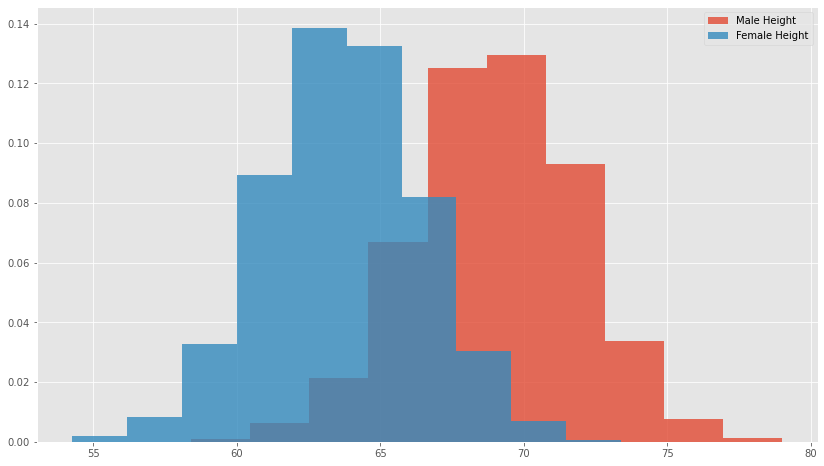

In [70]:
fix, ax = plt.subplots(figsize = (14,8))

plt.hist(male_df['Height'], bins = 10, alpha = .8, label = "Male Height", density = True)

plt.hist(female_df['Height'], bins = 10, alpha = .8, label = "Female Height", density = True)

plt.legend();

In [51]:
print('Yes, this is what I would expect as males are generally taller than females.')

Yes, this is what I would expect as males are generally taller than females.


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

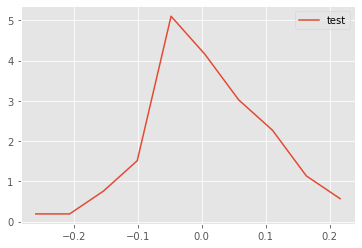

In [58]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

In [73]:
m_pdfx, m_pdfy = density(male_df['Height'])
f_pdfx, f_pdfy = density(female_df['Height'])

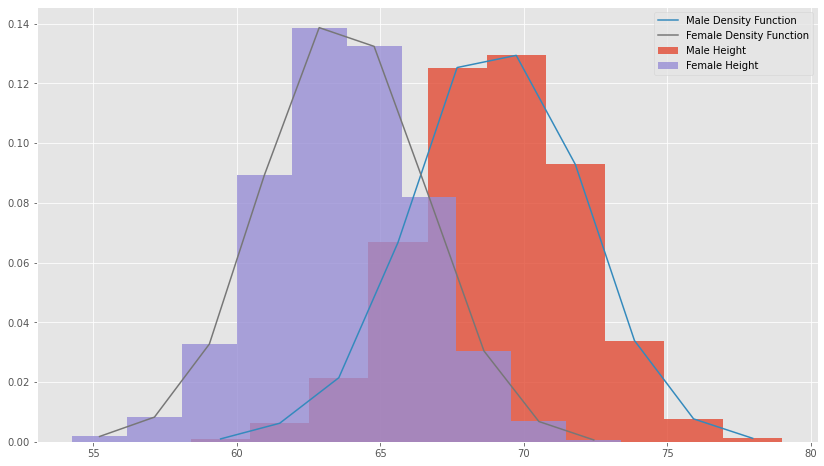

In [74]:
fix, ax = plt.subplots(figsize = (14,8))

plt.hist(male_df['Height'], bins = 10, alpha = .8, label = "Male Height", density = True)
plt.plot(m_pdfx, m_pdfy, label = 'Male Density Function')

plt.hist(female_df['Height'], bins = 10, alpha = .8, label = "Female Height", density = True)
plt.plot(f_pdfx, f_pdfy, label = 'Female Density Function')

plt.legend();

## Repeat the above exercise for male and female weights

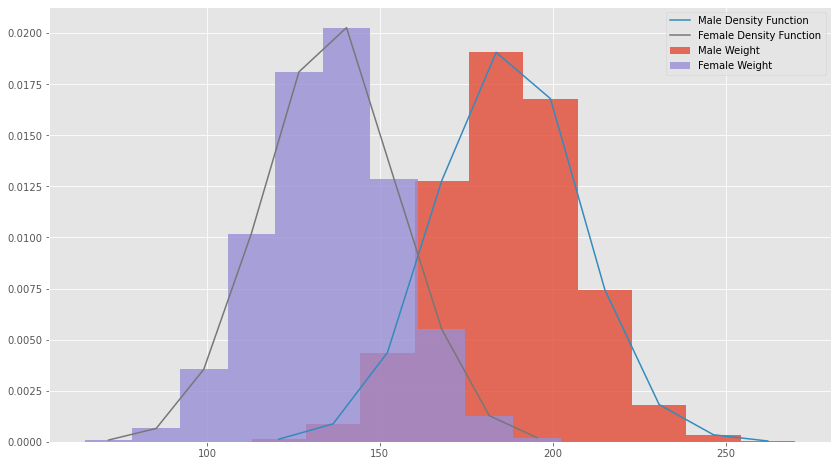

In [76]:
mw_pdfx, mw_pdfy = density(male_df['Weight'])
fw_pdfx, fw_pdfy = density(female_df['Weight'])

fix, ax = plt.subplots(figsize = (14,8))

plt.hist(male_df['Weight'], bins = 10, alpha = .8, label = "Male Weight", density = True)
plt.plot(mw_pdfx, mw_pdfy, label = 'Male Density Function')

plt.hist(female_df['Weight'], bins = 10, alpha = .8, label = "Female Weight", density = True)
plt.plot(fw_pdfx, fw_pdfy, label = 'Female Density Function')

plt.legend();

## Write your observations in the cell below

In [77]:
# Record your observations - are these inline with your personal observations?
print('Yes, this is what I would expect as males weigh more than females')

# What is the takeaway when comparing male and female heights and weights?

Yes, this is what I would expect as males weigh more than females


## Repeat the above experiments in seaborn and compare with your results

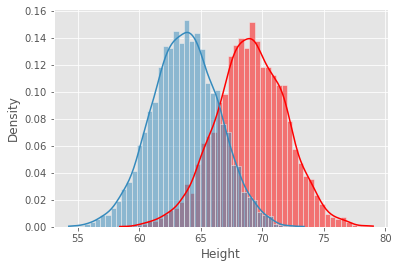

In [88]:
import seaborn as sns

sns.histplot(data=male_df['Height'], stat = 'density', color='red', kde=True)
sns.histplot(data=female_df['Height'], stat = 'density', kde=True);

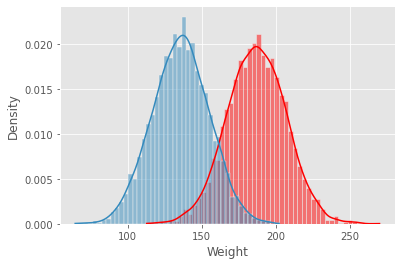

In [89]:
sns.histplot(data=male_df['Weight'], stat = 'density', color='red', kde=True)
sns.histplot(data=female_df['Weight'], stat = 'density', kde=True);

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.